In [ ]:
import pandas as pd
import requests
import io
from datetime import date, timedelta
import plotly.express as px
from jupyter_dash import JupyterDash
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/var/folders/p2/yql3__md6879nsmbwdbx3ncw0000gn/T/ipykernel_46975/2915922523.py:6: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/var/folders/p2/yql3__md6879nsmbwdbx3ncw0000gn/T/ipykernel_46975/2915922523.py:7: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [108]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv"
download = requests.get(url).content

df_mask = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [110]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-recent.csv"
download = requests.get(url).content

recents = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [109]:
df_mask.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [111]:
recents.head()

,date,county,state,fips,cases,deaths
0,2022-09-27,Autauga,Alabama,1001.0,18359,227.0
1,2022-09-27,Baldwin,Alabama,1003.0,65544,711.0
2,2022-09-27,Barbour,Alabama,1005.0,6881,102.0
3,2022-09-27,Bibb,Alabama,1007.0,7504,107.0
4,2022-09-27,Blount,Alabama,1009.0,16875,258.0


In [119]:
yesterday = date.today() - timedelta(1)

In [120]:
recents = recents[recents.date == str(yesterday)]

In [121]:
new = pd.merge(recents, df_mask, left_on = 'fips', right_on = 'COUNTYFP')

In [122]:
new.head()

,date,county,state,fips,cases,deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,2022-10-26,Autauga,Alabama,1001.0,18480,228.0,1001,0.053,0.074,0.134,0.295,0.444
1,2022-10-26,Baldwin,Alabama,1003.0,65895,716.0,1003,0.083,0.059,0.098,0.323,0.436
2,2022-10-26,Barbour,Alabama,1005.0,6926,103.0,1005,0.067,0.121,0.120,0.201,0.491
3,2022-10-26,Bibb,Alabama,1007.0,7560,108.0,1007,0.020,0.034,0.096,0.278,0.572
4,2022-10-26,Blount,Alabama,1009.0,17286,258.0,1009,0.053,0.114,0.180,0.194,0.459


In [129]:
df = pd.read_csv('United_States_COVID-19_Community_Levels_by_County.csv')


In [130]:
df = df[['county_fips', 'county_population', 'date_updated']]

In [131]:
df.tail()

,county_fips,county_population,date_updated
116055,72111,19249.0,2022-10-27
116056,72129,35989.0,2022-10-27
116057,72133,21209.0,2022-10-27
116058,72141,27395.0,2022-10-27
116059,72145,50023.0,2022-10-27


In [132]:
df = df[df.date_updated == '2022-10-27']

In [133]:
df = pd.merge(df, new, left_on = 'county_fips', right_on = 'COUNTYFP')

In [134]:
df.head()

,county_fips,county_population,date_updated,date,county,state,fips,cases,deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,48463,26741.0,2022-10-27,2022-10-26,Uvalde,Texas,48463.0,11362,147.0,48463,0.014,0.022,0.136,0.081,0.747
1,1011,10101.0,2022-10-27,2022-10-26,Bullock,Alabama,1011.0,2817,54.0,1011,0.031,0.040,0.144,0.286,0.500
2,1015,113605.0,2022-10-27,2022-10-26,Calhoun,Alabama,1015.0,38477,659.0,1015,0.152,0.108,0.130,0.167,0.442
3,1017,33254.0,2022-10-27,2022-10-26,Chambers,Alabama,1017.0,10017,169.0,1017,0.117,0.037,0.150,0.136,0.560
4,1025,23622.0,2022-10-27,2022-10-26,Clarke,Alabama,1025.0,8041,106.0,1025,0.049,0.088,0.164,0.268,0.430


In [136]:
df.drop(columns = ['fips' ,'date_updated', 'date', 'COUNTYFP'], inplace = True)

In [137]:
df.head()

,county_fips,county_population,county,state,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,48463,26741.0,Uvalde,Texas,11362,147.0,0.014,0.022,0.136,0.081,0.747
1,1011,10101.0,Bullock,Alabama,2817,54.0,0.031,0.040,0.144,0.286,0.500
2,1015,113605.0,Calhoun,Alabama,38477,659.0,0.152,0.108,0.130,0.167,0.442
3,1017,33254.0,Chambers,Alabama,10017,169.0,0.117,0.037,0.150,0.136,0.560
4,1025,23622.0,Clarke,Alabama,8041,106.0,0.049,0.088,0.164,0.268,0.430


In [138]:
df['cases_per_100k'] = (df['cases']/df['county_population'])*100000

In [139]:
df.head()

,county_fips,county_population,county,state,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,cases_per_100k
0,48463,26741.0,Uvalde,Texas,11362,147.0,0.014,0.022,0.136,0.081,0.747,42489.061740
1,1011,10101.0,Bullock,Alabama,2817,54.0,0.031,0.040,0.144,0.286,0.500,27888.327888
2,1015,113605.0,Calhoun,Alabama,38477,659.0,0.152,0.108,0.130,0.167,0.442,33869.107874
3,1017,33254.0,Chambers,Alabama,10017,169.0,0.117,0.037,0.150,0.136,0.560,30122.692007
4,1025,23622.0,Clarke,Alabama,8041,106.0,0.049,0.088,0.164,0.268,0.430,34040.301414


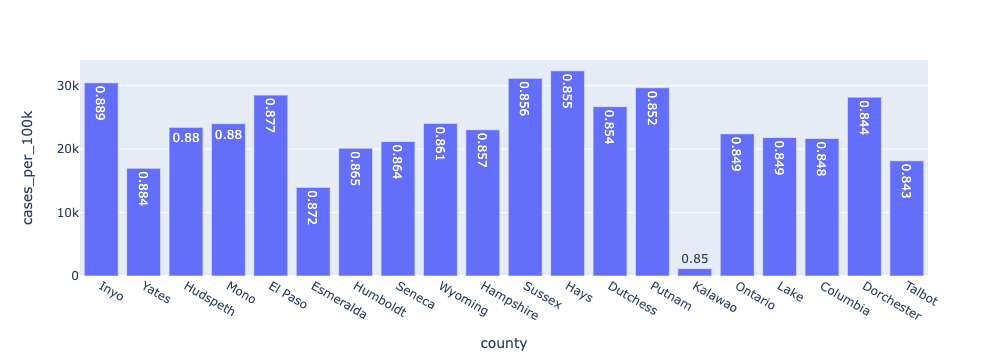

In [151]:
px.bar(df.sort_values(by = 'ALWAYS',ascending=False).head(20), y='cases_per_100k', x='county', text='ALWAYS')

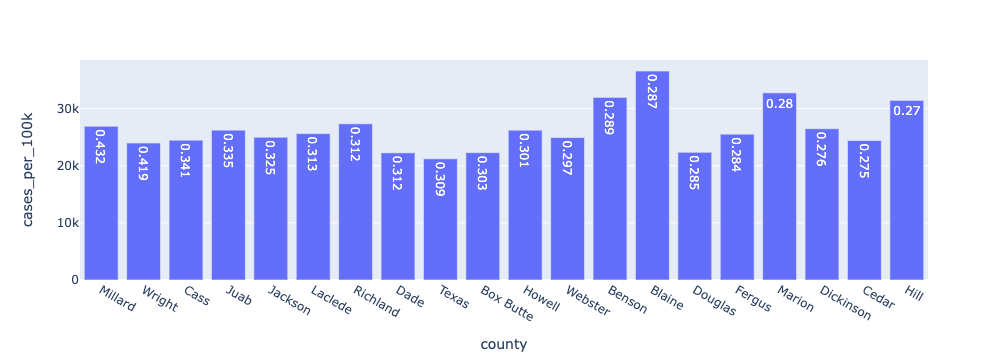

In [152]:
px.bar(df.sort_values(by = 'NEVER',ascending=False).head(20), y='cases_per_100k', x='county', text='NEVER')